In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings('ignore')

## Scenario

Problem-Statement(Bank_data)

    Output variable -> y
    y -> Whether the client has subscribed a term deposit or not
    Binomial ("yes" or "no")


bank-names

    Attribute information For bank dataset

  ### Input variables:
  //bank client data:
  
    1 - age (numeric)
    2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student", "blue-collar","self-employed","retired","technician","services")
    3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
    4 - education (categorical: "unknown","secondary","primary","tertiary")
    5 - default: has credit in default? (binary: "yes","no")
    6 - balance: average yearly balance, in euros (numeric)
    7 - housing: has housing loan? (binary: "yes","no")
    8 - loan: has personal loan? (binary: "yes","no")
// related with the last contact of the current campaign:
  
    9 - contact: contact communication type (categorical: "unknown","telephone","cellular")
    10 - day: last contact day of the month (numeric)
    11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
    12 - duration: last contact duration, in seconds (numeric)
// other attributes:
  
    13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
    14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
    15 - previous: number of contacts performed before this campaign and for this client (numeric)
    16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

### Output variable (desired target):
    17 - y - has the client subscribed a term deposit? (binary: "yes","no")

    8. Missing Attribute Values: None



## EDA


#### Loading data

In [3]:
from google.colab import files
uploaded = files.upload()

Saving bank-full.csv to bank-full.csv


In [4]:
df = pd.read_csv('bank-full.csv',delimiter=';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


#### Datatype and Basic Information Checking

In [5]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [7]:
df.shape

(45211, 17)

#### Checking Duplication of rows and columns

In [10]:
dup_rows = df[df.duplicated(keep=False)]
dup_rows

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y


In [11]:
dup_cols = df.T.duplicated(keep=False)
dup_cols

age          False
job          False
marital      False
education    False
default      False
balance      False
housing      False
loan         False
contact      False
day          False
month        False
duration     False
campaign     False
pdays        False
previous     False
poutcome     False
y            False
dtype: bool

#### Checking Null Values

In [12]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

    No null values present

#### Outlier Detection

In [13]:
data = df.describe()

In [14]:
data

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


       age      job   marital  education default  balance housing loan  \
29158   83  retired   married    primary      no      425      no   no   
29261   75  retired  divorced    primary      no       46      no   no   
29263   75  retired   married    primary      no     3324      no   no   
29322   83  retired   married   tertiary      no     6236      no   no   
29865   75  retired  divorced    primary      no     3881     yes   no   
...    ...      ...       ...        ...     ...      ...     ...  ...   
45163   71  retired   married  secondary      no     2064      no   no   
45191   75  retired  divorced   tertiary      no     3810     yes   no   
45204   73  retired   married  secondary      no     2850      no   no   
45207   71  retired  divorced    primary      no     1729      no   no   
45208   72  retired   married  secondary      no     5715      no   no   

         contact  day month  duration  campaign  pdays  previous poutcome    y  
29158  telephone    2   feb   

<Axes: >

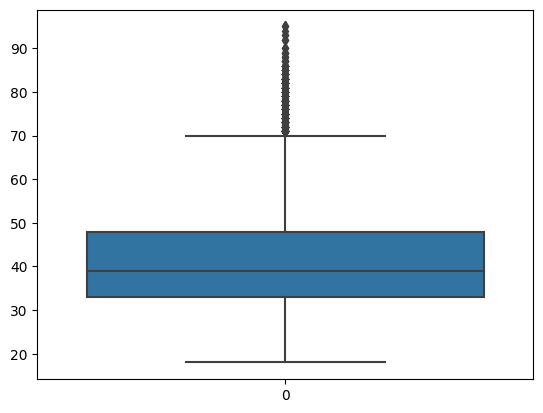

In [15]:
# For age

q1 = data.iloc[4,0]
q3 = data.iloc[6,0]
iqr = q3-q1

lower_limit = q1 - 1.5*iqr
upper_limit = q3 + 1.5*iqr
print(df[(df['age']<lower_limit) | (df['age']>upper_limit)])
# print(len(df[(df['age']<lower_limit) | (df['age']>upper_limit)]))

sns.boxplot(df['age'])

       age          job   marital  education default  balance housing loan  \
34      51   management   married   tertiary      no    10635     yes   no   
65      51   management   married   tertiary      no     6530     yes   no   
69      35  blue-collar    single  secondary      no    12223     yes  yes   
70      57  blue-collar   married  secondary      no     5935     yes  yes   
186     40     services  divorced    unknown      no     4384     yes   no   
...    ...          ...       ...        ...     ...      ...     ...  ...   
45164   35     services   married   tertiary      no     4655      no   no   
45181   46  blue-collar   married  secondary      no     6879      no   no   
45185   60     services   married   tertiary      no     4256     yes   no   
45191   75      retired  divorced   tertiary      no     3810     yes   no   
45208   72      retired   married  secondary      no     5715      no   no   

        contact  day month  duration  campaign  pdays  previous

<Axes: >

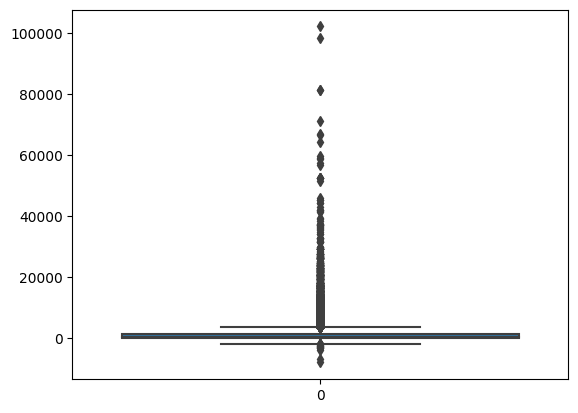

In [16]:
# For balance

q1 = data.iloc[4,1]
q3 = data.iloc[6,1]
iqr = q3-q1

lower_limit = q1 - 1.5*iqr
upper_limit = q3 + 1.5*iqr
print(df[(df['balance']<lower_limit) | (df['balance']>upper_limit)])
# print(len(df[(df['balance']<lower_limit) | (df['balance']>upper_limit)]))

sns.boxplot(df['balance'])

Empty DataFrame
Columns: [age, job, marital, education, default, balance, housing, loan, contact, day, month, duration, campaign, pdays, previous, poutcome, y]
Index: []


<Axes: >

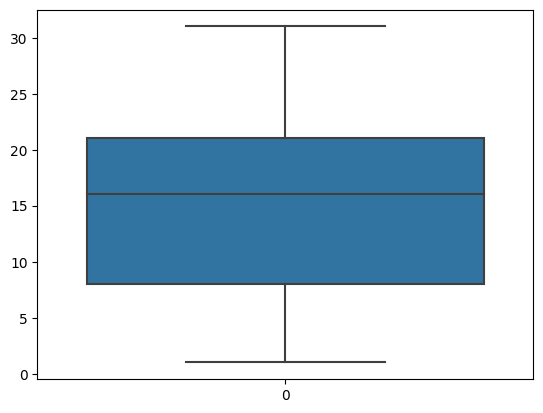

In [17]:
# For day

q1 = data.iloc[4,2]
q3 = data.iloc[6,2]
iqr = q3-q1

lower_limit = q1 - 1.5*iqr
upper_limit = q3 + 1.5*iqr
print(df[(df['day']<lower_limit) | (df['day']>upper_limit)])
# print(len(df[(df['day']<lower_limit) | (df['day']>upper_limit)]))

sns.boxplot(df['day'])

       age          job   marital  education default  balance housing loan  \
37      53   technician   married  secondary      no       -3      no   no   
43      54      retired   married  secondary      no      529     yes   no   
53      42       admin.    single  secondary      no      -76     yes   no   
59      46     services   married    primary      no      179     yes   no   
61      53   technician  divorced  secondary      no      989     yes   no   
...    ...          ...       ...        ...     ...      ...     ...  ...   
45124   27  blue-collar    single    primary      no      232     yes   no   
45199   34  blue-collar    single  secondary      no     1475     yes   no   
45200   38   technician   married  secondary      no      557     yes   no   
45206   51   technician   married   tertiary      no      825      no   no   
45208   72      retired   married  secondary      no     5715      no   no   

        contact  day month  duration  campaign  pdays  previous

<Axes: >

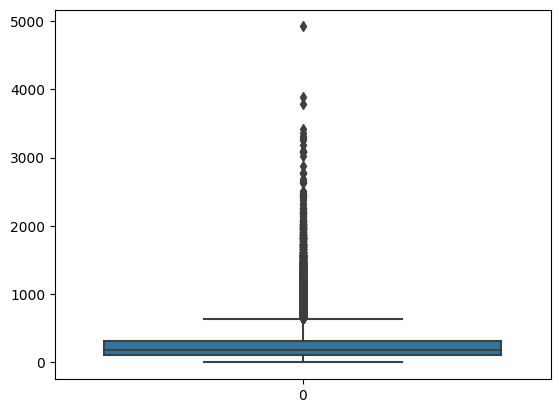

In [18]:
# For duration

q1 = data.iloc[4,3]
q3 = data.iloc[6,3]
iqr = q3-q1

lower_limit = q1 - 1.5*iqr
upper_limit = q3 + 1.5*iqr
print(df[(df['duration']<lower_limit) | (df['duration']>upper_limit)])
# print(len(df[(df['duration']<lower_limit) | (df['duration']>upper_limit)]))

sns.boxplot(df['duration'])

       age            job  marital  education default  balance housing loan  \
758     59       services  married  secondary      no      307     yes  yes   
780     30         admin.  married  secondary      no        4      no   no   
906     27       services   single  secondary      no        0     yes   no   
1103    52     technician  married    unknown      no      133     yes   no   
1105    43         admin.  married   tertiary      no     1924     yes   no   
...    ...            ...      ...        ...     ...      ...     ...  ...   
44666   25     technician   single  secondary      no     1298      no   no   
44680   27  self-employed   single   tertiary      no      560      no   no   
44770   37       services   single   tertiary      no     1189      no   no   
44886   38     management  married   tertiary      no        0      no   no   
45056   64     management  married   tertiary      no     5112      no   no   

         contact  day month  duration  campaign  pd

<Axes: >

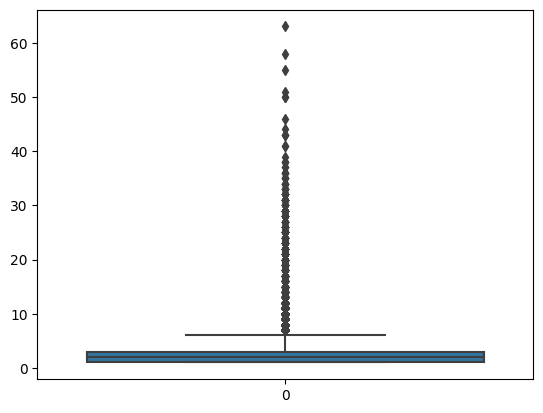

In [19]:
# For campaign

q1 = data.iloc[4,4]
q3 = data.iloc[6,4]
iqr = q3-q1

lower_limit = q1 - 1.5*iqr
upper_limit = q3 + 1.5*iqr
print(df[(df['campaign']<lower_limit) | (df['campaign']>upper_limit)])
# print(len(df[(df['campaign']<lower_limit) | (df['campaign']>upper_limit)]))

sns.boxplot(df['campaign'])

       age           job  marital  education default  balance housing loan  \
24060   33        admin.  married   tertiary      no      882      no   no   
24062   42        admin.   single  secondary      no     -247     yes  yes   
24064   33      services  married  secondary      no     3444     yes   no   
24072   36    management  married   tertiary      no     2415     yes   no   
24077   36    management  married   tertiary      no        0     yes   no   
...    ...           ...      ...        ...     ...      ...     ...  ...   
45199   34   blue-collar   single  secondary      no     1475     yes   no   
45201   53    management  married   tertiary      no      583      no   no   
45204   73       retired  married  secondary      no     2850      no   no   
45208   72       retired  married  secondary      no     5715      no   no   
45210   37  entrepreneur  married  secondary      no     2971      no   no   

         contact  day month  duration  campaign  pdays  previou

<Axes: >

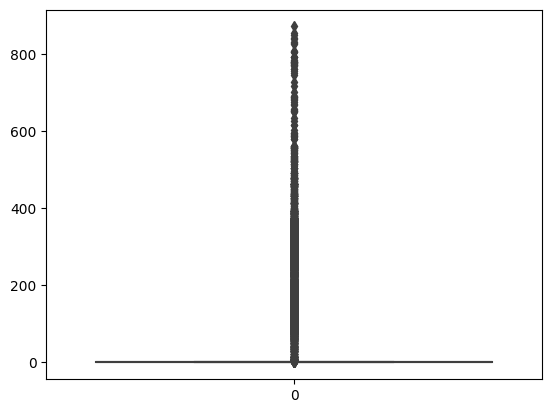

In [20]:
# For pdays

q1 = data.iloc[4,5]
q3 = data.iloc[6,5]
iqr = q3-q1

lower_limit = q1 - 1.5*iqr
upper_limit = q3 + 1.5*iqr
print(df[(df['pdays']<lower_limit) | (df['pdays']>upper_limit)])
# print(len(df[(df['pdays']<lower_limit) | (df['pdays']>upper_limit)]))

sns.boxplot(df['pdays'])

       age           job  marital  education default  balance housing loan  \
24060   33        admin.  married   tertiary      no      882      no   no   
24062   42        admin.   single  secondary      no     -247     yes  yes   
24064   33      services  married  secondary      no     3444     yes   no   
24072   36    management  married   tertiary      no     2415     yes   no   
24077   36    management  married   tertiary      no        0     yes   no   
...    ...           ...      ...        ...     ...      ...     ...  ...   
45199   34   blue-collar   single  secondary      no     1475     yes   no   
45201   53    management  married   tertiary      no      583      no   no   
45204   73       retired  married  secondary      no     2850      no   no   
45208   72       retired  married  secondary      no     5715      no   no   
45210   37  entrepreneur  married  secondary      no     2971      no   no   

         contact  day month  duration  campaign  pdays  previou

<Axes: >

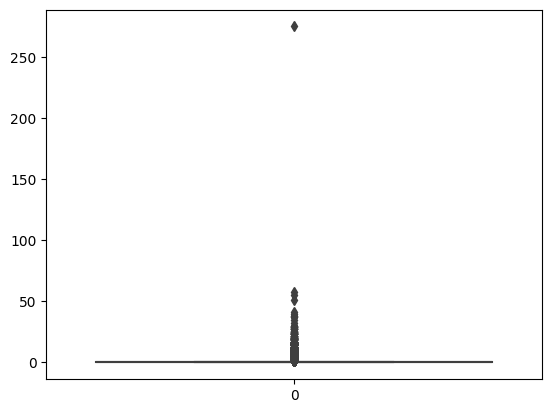

In [21]:
# For previous

q1 = data.iloc[4,6]
q3 = data.iloc[6,6]
iqr = q3-q1

lower_limit = q1 - 1.5*iqr
upper_limit = q3 + 1.5*iqr
print(df[(df['previous']<lower_limit) | (df['previous']>upper_limit)])
# print(len(df[(df['previous']<lower_limit) | (df['previous']>upper_limit)]))

sns.boxplot(df['previous'])

#### Correlation Analysis

In [22]:
df.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


<Axes: >

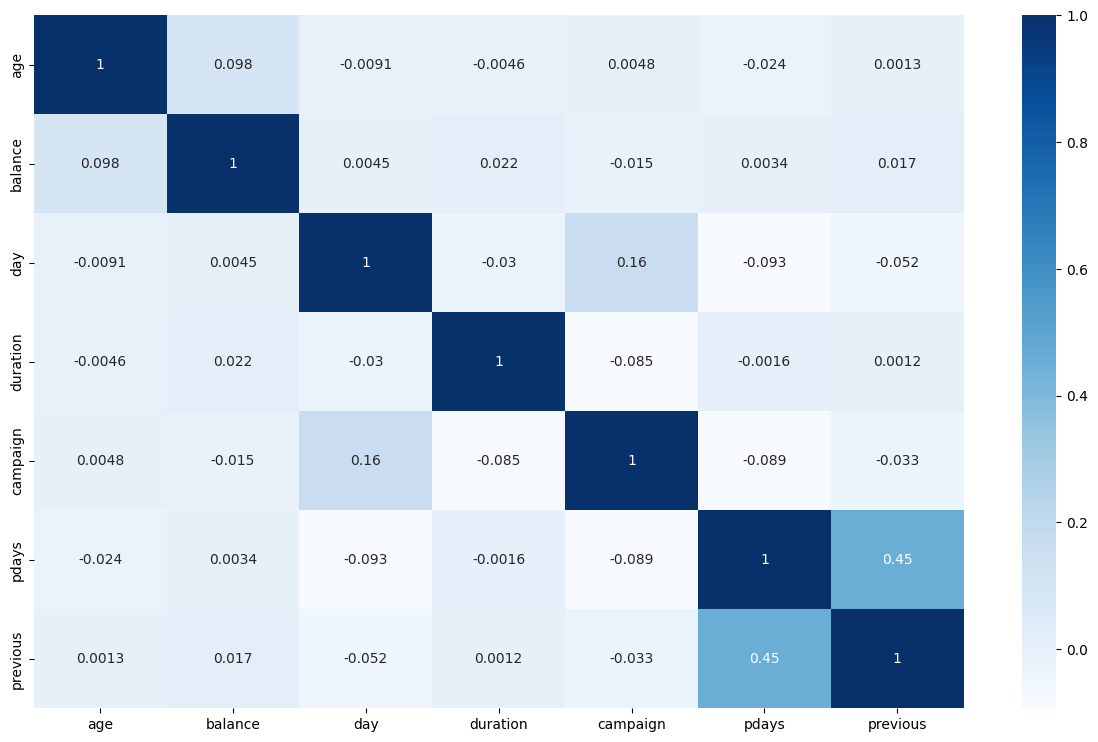

In [23]:
corr_mat = df.corr()

plt.figure(figsize=(15,9))
sns.heatmap(corr_mat,annot=True,cmap='Blues')

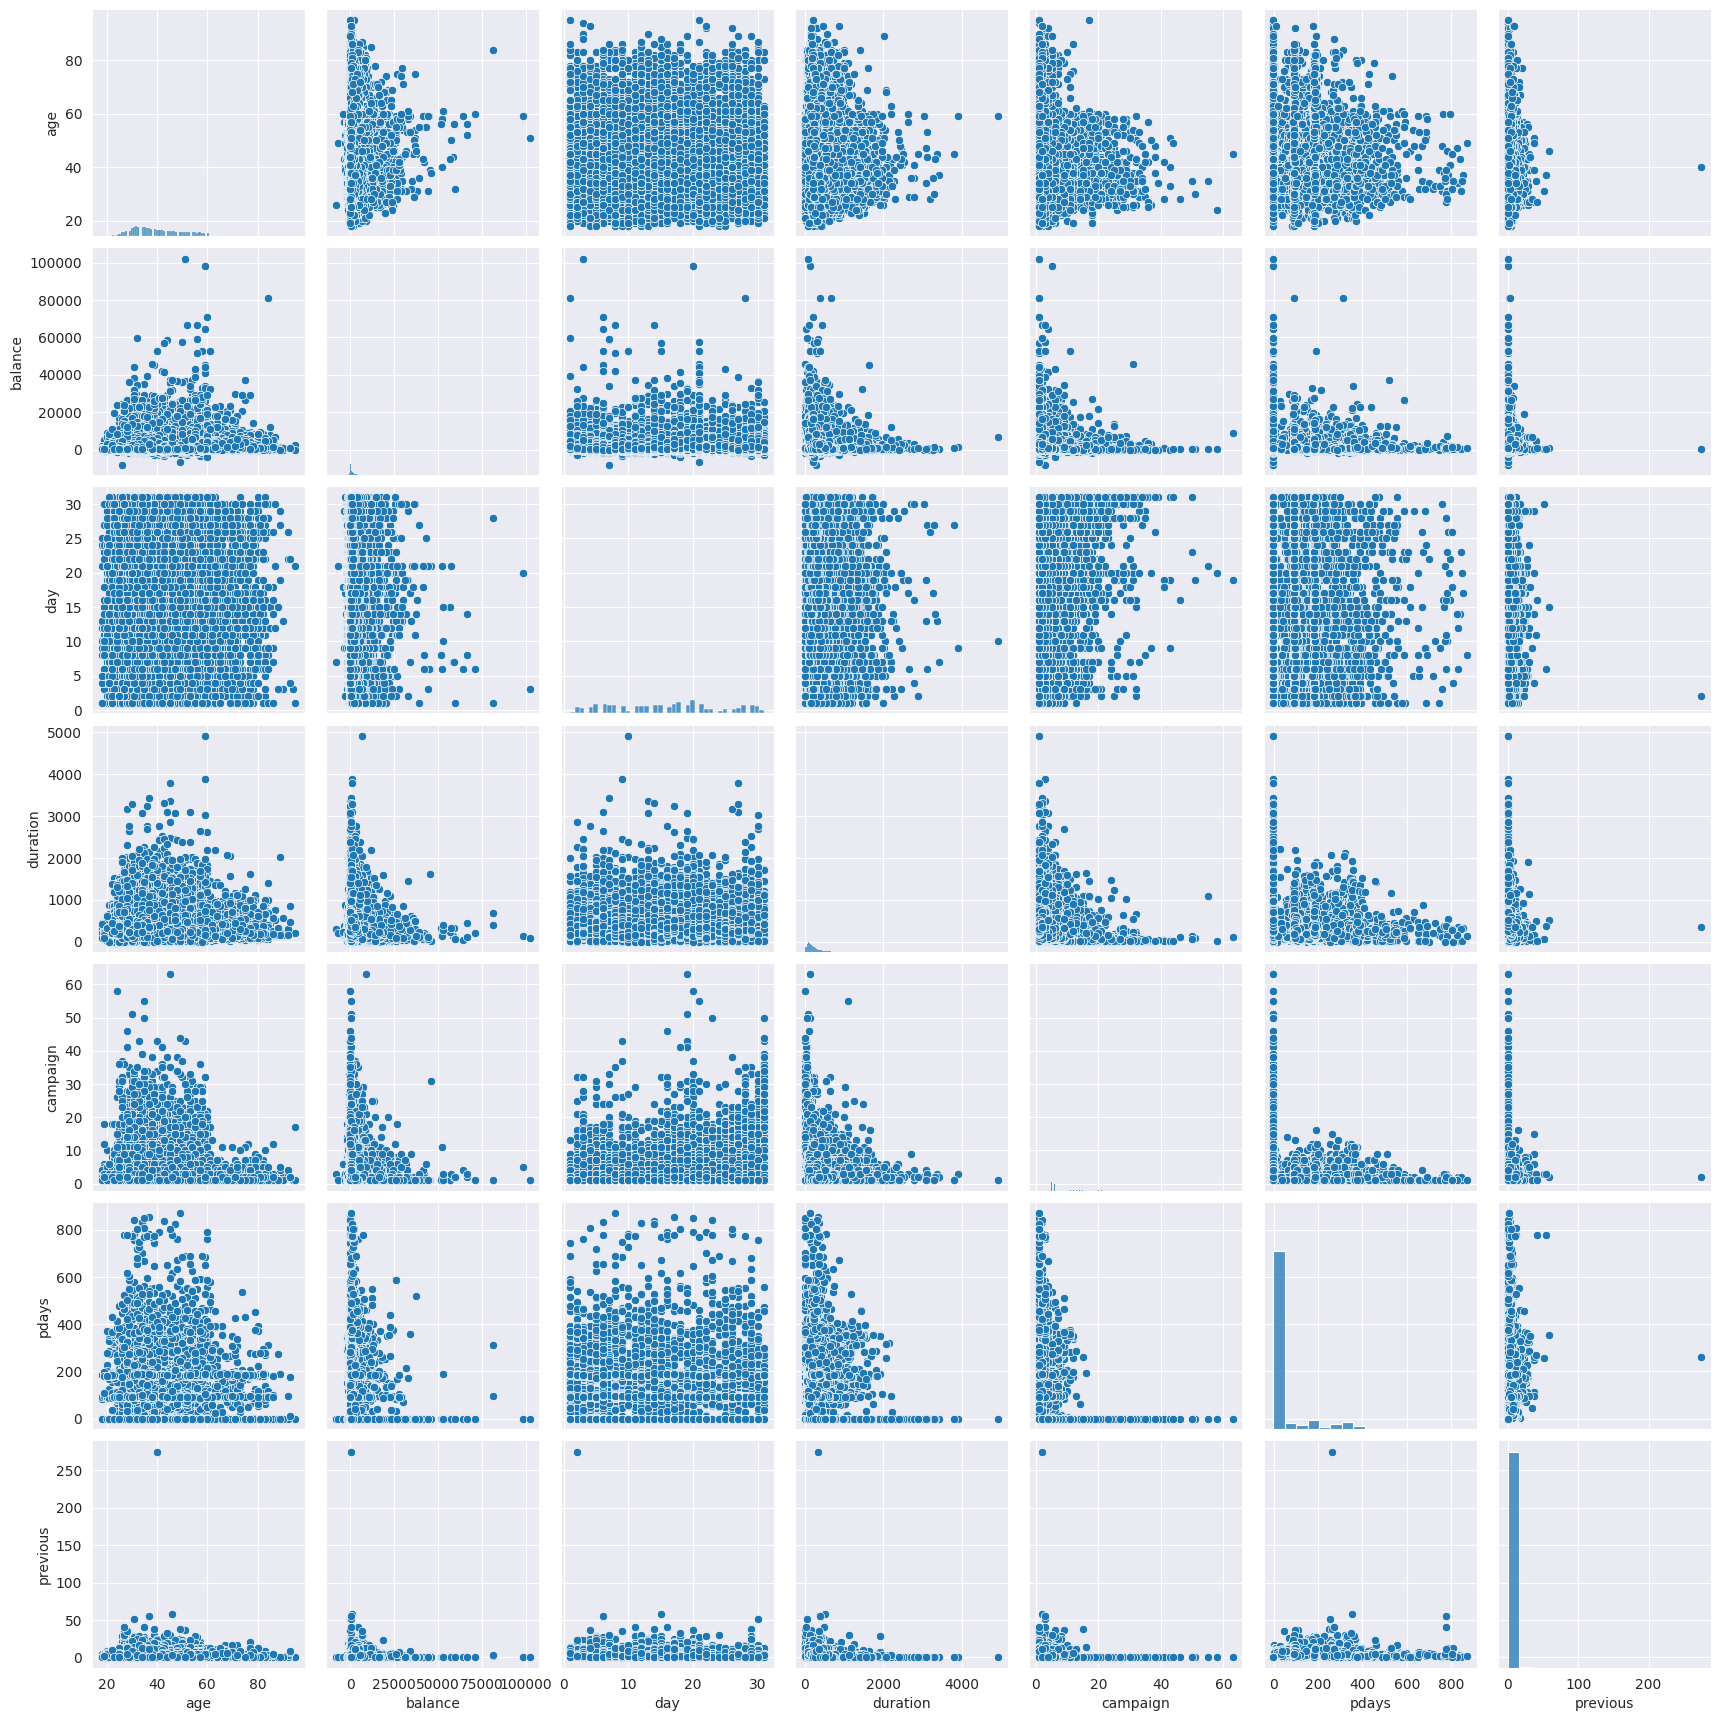

In [24]:
sns.set_style(style='darkgrid')
sns.pairplot(df)

#### Label Encoding for Categorical variable

In [25]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [26]:
df['job'].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [27]:
df1 = df

In [28]:
from sklearn.preprocessing import LabelEncoder

In [29]:
lb = LabelEncoder()

for column in df1.columns:
  if df1[column].dtype == 'object':
    df1[column] = lb.fit_transform(df1[column])
df1

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,0,17,9,977,3,-1,0,3,1
45207,71,5,0,0,0,1729,0,0,0,17,9,456,2,-1,0,3,1
45208,72,5,1,1,0,5715,0,0,0,17,9,1127,5,184,3,2,1
45209,57,1,1,1,0,668,0,0,1,17,9,508,4,-1,0,3,0


#### Correlation Analysis

In [30]:
df1.corr()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
age,1.000000,-0.021868,-0.403240,-0.106807,-0.017879,0.097783,-0.185513,-0.015655,0.026221,-0.009120,-0.042357,-0.004648,0.004760,-0.023758,0.001288,0.007367,0.025155
job,-0.021868,1.000000,0.062045,0.166707,-0.006853,0.018232,-0.125363,-0.033004,-0.082063,0.022856,-0.092870,0.004744,0.006839,-0.024455,-0.000911,0.011010,0.040438
marital,-0.403240,0.062045,1.000000,0.108576,-0.007023,0.002122,-0.016096,-0.046893,-0.039201,-0.005261,-0.006991,0.011852,-0.008994,0.019172,0.014973,-0.016850,0.045588
education,-0.106807,0.166707,0.108576,1.000000,-0.010718,0.064514,-0.090790,-0.048574,-0.110928,0.022671,-0.057304,0.001935,0.006255,0.000052,0.017570,-0.019361,0.066241
default,-0.017879,-0.006853,-0.007023,-0.010718,1.000000,-0.066745,-0.006025,0.077234,0.015404,0.009424,0.011486,-0.010021,0.016822,-0.029979,-0.018329,0.034898,-0.022419
balance,0.097783,0.018232,0.002122,0.064514,-0.066745,1.000000,-0.068768,-0.084350,-0.027273,0.004503,0.019777,0.021560,-0.014578,0.003435,0.016674,-0.020967,0.052838
housing,-0.185513,-0.125363,-0.016096,-0.090790,-0.006025,-0.068768,1.000000,0.041323,0.188123,-0.027982,0.271481,0.005075,-0.023599,0.124178,0.037076,-0.099971,-0.139173
loan,-0.015655,-0.033004,-0.046893,-0.048574,0.077234,-0.084350,0.041323,1.000000,-0.010873,0.011370,0.022145,-0.012412,0.009980,-0.022754,-0.011043,0.015458,-0.068185
contact,0.026221,-0.082063,-0.039201,-0.110928,0.015404,-0.027273,0.188123,-0.010873,1.000000,-0.027936,0.361145,-0.020839,0.019614,-0.244816,-0.147811,0.272214,-0.148395
day,-0.009120,0.022856,-0.005261,0.022671,0.009424,0.004503,-0.027982,0.011370,-0.027936,1.000000,-0.006028,-0.030206,0.162490,-0.093044,-0.051710,0.083460,-0.028348


<Axes: >

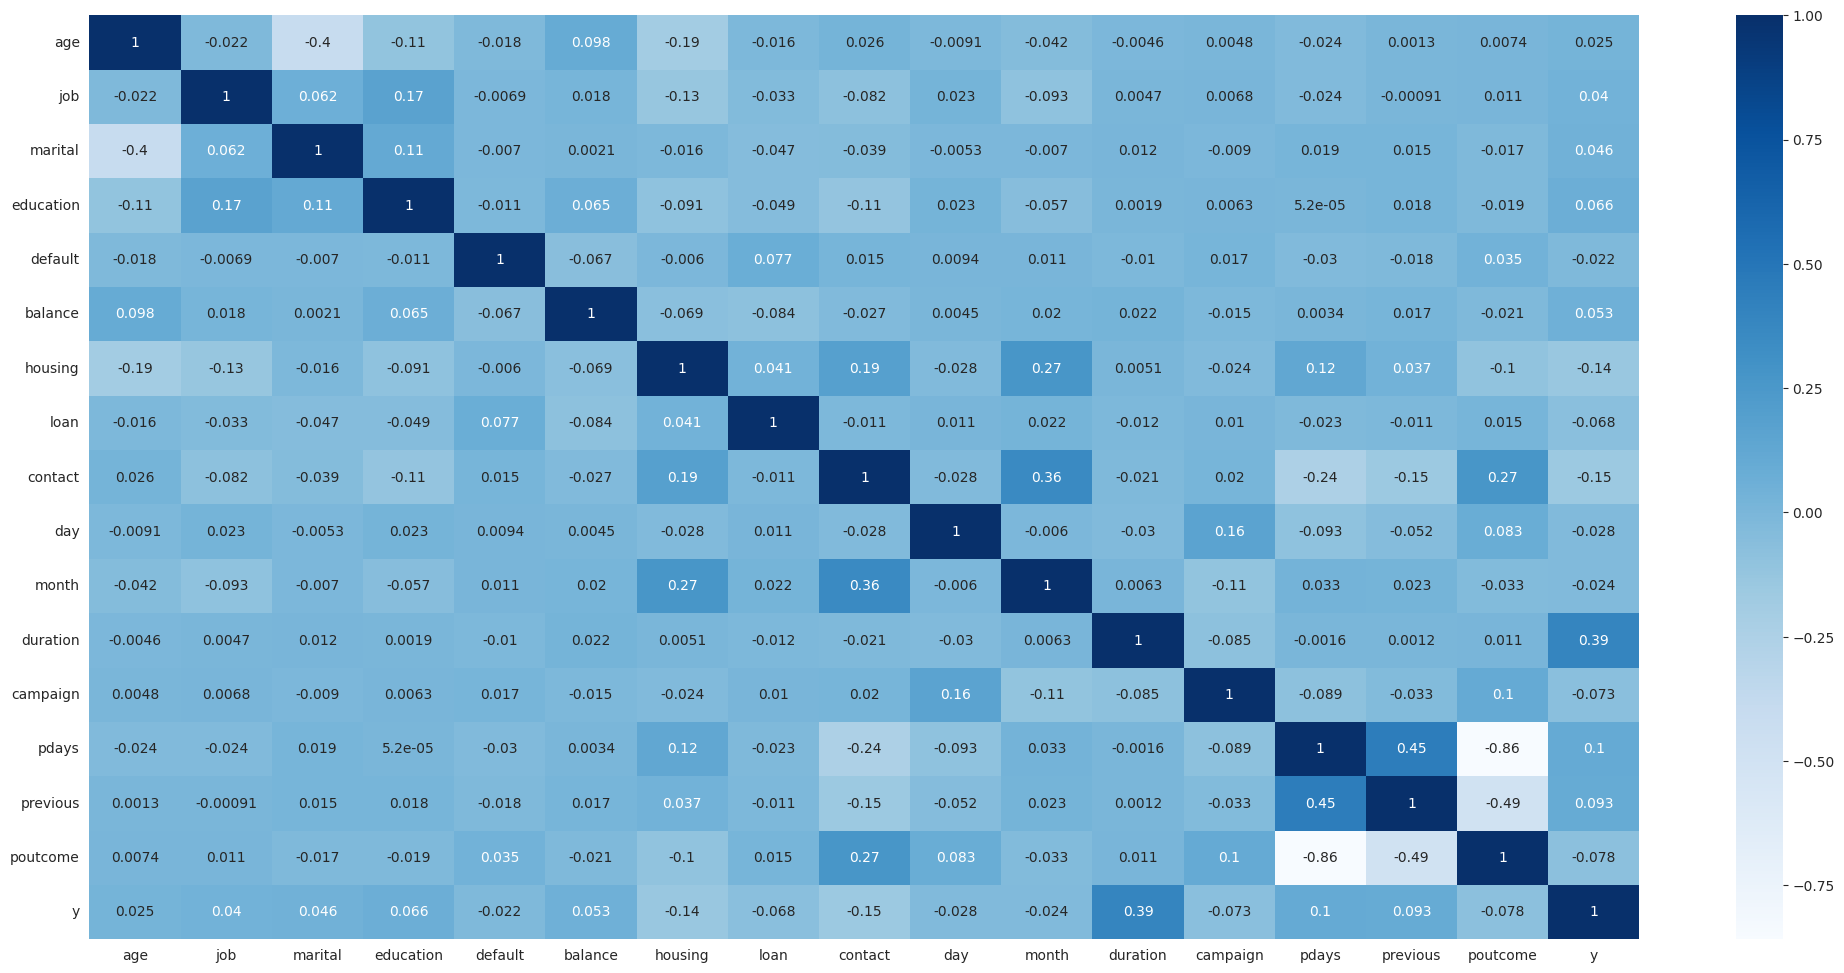

In [31]:
corr_mat = df1.corr()

plt.figure(figsize=(25,12))
sns.heatmap(corr_mat,annot=True,cmap='Blues')

In [32]:
X = df1.iloc[:,:16]
y = df1.iloc[:,-1]

In [33]:
X

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,0,17,9,977,3,-1,0,3
45207,71,5,0,0,0,1729,0,0,0,17,9,456,2,-1,0,3
45208,72,5,1,1,0,5715,0,0,0,17,9,1127,5,184,3,2
45209,57,1,1,1,0,668,0,0,1,17,9,508,4,-1,0,3


In [34]:
y

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 45211, dtype: int64

## Model Building

In [36]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X,y)

LogisticRegression()

In [37]:
y_pred = lr.predict(X)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [38]:
y_pred_df = pd.DataFrame({'actual':y,'predicted prob':y_pred})
y_pred_df

,actual,predicted prob
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
45206,1,0
45207,1,0
45208,1,0
45209,0,0


## Model Evaluation

#### Confusion Matrix

In [41]:
from sklearn.metrics import confusion_matrix

cfm = confusion_matrix(y,y_pred)
print(cfm)

[[39279   643]
 [ 4437   852]]


    Here, we can conclude that the number of clients who have not subscribed the term deposit is way higher than the subscribed term deposit which further can be seen in below classification report and ROC Curve.

In [40]:
((39279+852)/(39279+852+643+4437))*100

88.76379642122492

#### Classification Report

In [42]:
from sklearn.metrics import classification_report
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     39922
           1       0.57      0.16      0.25      5289

    accuracy                           0.89     45211
   macro avg       0.73      0.57      0.60     45211
weighted avg       0.86      0.89      0.86     45211



    Here, we can see model is giving 89 percentage of Accuracy

#### ROC Curve

Text(0, 0.5, 'True Positive Rate')

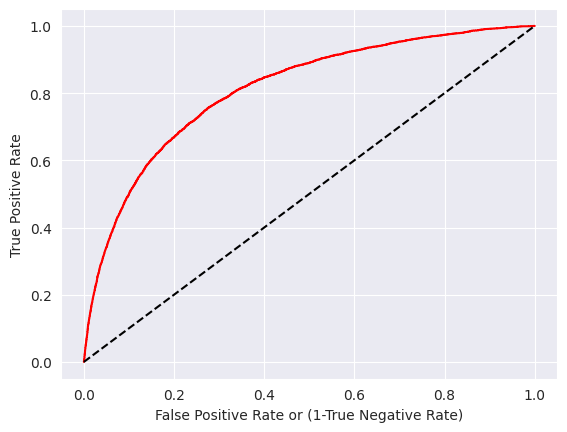

In [46]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, threshold = roc_curve(y,lr.predict_proba(X)[:,1])

auc = roc_auc_score(y,y_pred)

plt.plot(fpr,tpr,color='red',label = 'logit model (area = %0.2f)'%auc)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate or (1-True Negative Rate)')
plt.ylabel('True Positive Rate')

In [44]:
auc

0.5724913226281891

    
    By Samit Dhawal